<a href="https://colab.research.google.com/github/faizz10/datascience/blob/main/program13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

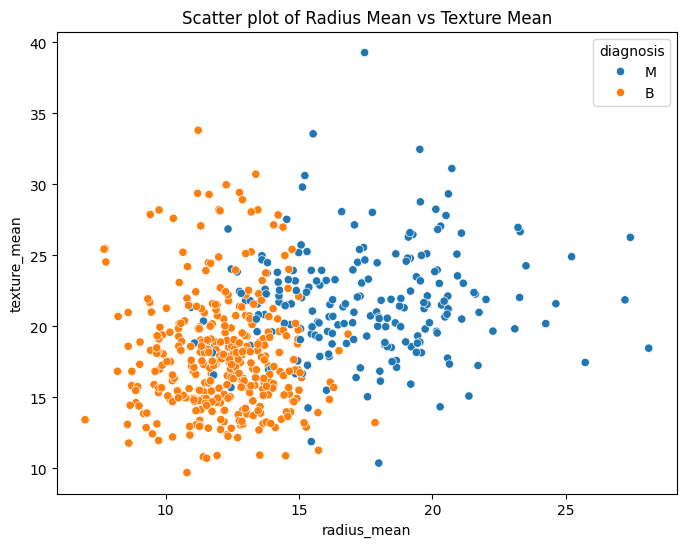

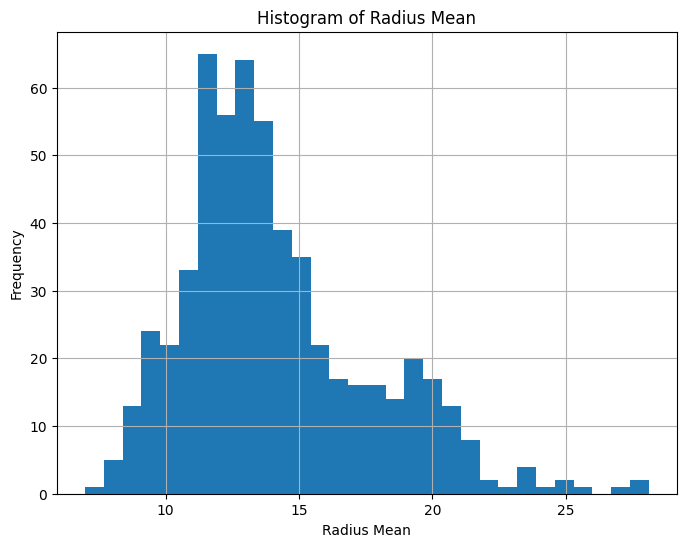

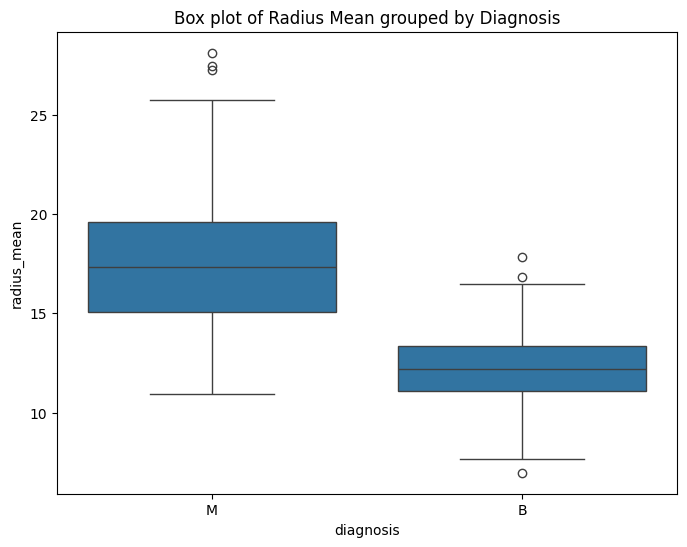

In [2]:
import pandas as pd
df=pd.read_csv('/content/breast-cancer.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
if 'diagnosis' in df.columns:
  print(df['diagnosis'].value_counts())

#b)visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='radius_mean',y='texture_mean',hue='diagnosis',data=df)
plt.title("Scatter plot of Radius Mean vs Texture Mean")
plt.show()
plt.figure(figsize=(8,6))
df['radius_mean'].hist(bins=30)
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis',y='radius_mean',data=df)
plt.title("Box plot of Radius Mean grouped by Diagnosis")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score

df_cleaned=df.dropna()
X=df_cleaned.drop(['diagnosis'],axis=1)
y=df_cleaned['diagnosis']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

Classification Report:
               precision    recall  f1-score   support

           B       0.62      0.99      0.76        71
           M       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114

Accuracy:0.6140
